In [1]:
# importing libraries
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
import statsmodels.formula.api as smf 
import sys

# specifying file name
file = '/home/nanwang/github/python-algrothm/python-algrothm/Machine Learning/Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
dataset = pd.read_excel(file)


In [2]:
dataset.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205


In [3]:
def mv_flagger(df):
    for col in df:
        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
    return df

In [4]:
dataset.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')

In [5]:
# imputing email

# process emails
# placeholder list
placeholder_lst = []

email_set_professional = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
email_set_personal = ['@gmail.com','@yahoo.com','@protonmail.com']
email_set_junk = ['@me.com','@aol.com','@hotmail.com','@live.com @msn.com','@passport.com']

# looping over each email address
for index, col in dataset.iterrows():
    
    # splitting email domain at '@'
    split_email = dataset.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    if('@'+split_email[1] in email_set_professional):
        placeholder_lst.append('PREFESSIONAL')
    elif('@'+split_email[1] in email_set_personal):
        placeholder_lst.append('PERSONAL')
    elif('@'+split_email[1] in email_set_junk):
        placeholder_lst.append('JUNK')
    else:
        placeholder_lst.append('UNKNOWN')

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# one hot email
one_hot_email = pd.get_dummies(email_df,prefix='EMAIL',prefix_sep='_')

# joining codings together
df = dataset.join(one_hot_email)

# drop EMAIL
df = df.drop('EMAIL',axis = 1)

# check result 
df.head()


,REVENUE,CROSS_SELL_SUCCESS,NAME,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,...,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN
0,393.0,1,Saathos,Saathos,Saathos,14,6,12,10,48.00,...,33.4,1,0,1,17,0,0,0,1,0
1,1365.0,1,Alysanne Osgrey,Alysanne,Osgrey,87,3,8,8,40.35,...,84.8,1,0,3,13,170,0,0,1,0
2,800.0,1,Edwyd Fossoway,Edwyd,Fossoway,15,7,11,5,19.77,...,63.0,1,0,2,16,0,0,0,1,0
3,600.0,1,Eleyna Westerling,Eleyna,Westerling,13,6,11,5,90.00,...,43.8,1,0,2,14,0,0,0,1,0
4,1490.0,1,Elyn Norridge,Elyn,Norridge,47,8,6,10,40.38,...,84.8,1,1,3,12,205,0,0,1,0


In [6]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [7]:
df = df.drop(['NAME','FIRST_NAME','FAMILY_NAME'],axis = 1)
df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
       'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
       'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
       'TOTAL_PHOTOS_VIEWED', 'EMAIL_JUNK', 'EMAIL_PERSONAL',
       'EMAIL_PREFESSIONAL', 'EMAIL_UNKNOWN'],
      dtype='object')

In [8]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [9]:
# advance more features
# TASTES_AND_PREFERENCES
# 根据是否设置口味偏好来判断是否为新用户

# 
df['CUSTOMERS_TYPE_TASTES_AND_PREFERENCES'] = 'OTHER'
df['CUSTOMERS_TYPE_TASTES_AND_PREFERENCES'][df['TASTES_AND_PREFERENCES'] == 0] ='Existing'
df['CUSTOMERS_TYPE_TASTES_AND_PREFERENCES'][df['TASTES_AND_PREFERENCES'] == 1] ='New'

# one hot TASTES_AND_PREFERENCES
one_hot_tap = pd.get_dummies(df['CUSTOMERS_TYPE_TASTES_AND_PREFERENCES'],prefix='Customers',prefix_sep='_')

# joining codings together
df = df.join(one_hot_tap)

# drop EMAIL
df = df.drop(['TASTES_AND_PREFERENCES','CUSTOMERS_TYPE_TASTES_AND_PREFERENCES'],axis = 1)

# check result 
df.head()


,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN,Customers_Existing,Customers_New
0,393.0,1,14,6,12,10,48.00,1,3,1,...,0,1,17,0,0,0,1,0,0,1
1,1365.0,1,87,3,8,8,40.35,1,0,0,...,0,3,13,170,0,0,1,0,0,1
2,800.0,1,15,7,11,5,19.77,1,3,0,...,0,2,16,0,0,0,1,0,0,1
3,600.0,1,13,6,11,5,90.00,1,2,0,...,0,2,14,0,0,0,1,0,0,1
4,1490.0,1,47,8,6,10,40.38,1,0,0,...,1,3,12,205,0,0,1,0,1,0


In [10]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [11]:
# define if is new customer by phone num

# 
df['CUSTOMERS_TYPE_MOBILE_NUMBER'] = 'OTHERS'
df['CUSTOMERS_TYPE_MOBILE_NUMBER'][df['MOBILE_NUMBER'] == 0] ='Existing'
df['CUSTOMERS_TYPE_MOBILE_NUMBER'][df['MOBILE_NUMBER'] == 1] ='New'

# one hot TASTES_AND_PREFERENCES
one_hot_tap = pd.get_dummies(df['CUSTOMERS_TYPE_MOBILE_NUMBER'],prefix='Customers_MOBILE',prefix_sep='_')

# joining codings together
df = df.join(one_hot_tap)

# drop EMAIL
df = df.drop(['MOBILE_NUMBER','CUSTOMERS_TYPE_MOBILE_NUMBER'],axis = 1)

# check result 
df.head()




,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,PC_LOGINS,...,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_JUNK,EMAIL_PERSONAL,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN,Customers_Existing,Customers_New,Customers_MOBILE_Existing,Customers_MOBILE_New
0,393.0,1,14,6,12,10,48.00,3,1,5,...,17,0,0,0,1,0,0,1,0,1
1,1365.0,1,87,3,8,8,40.35,0,0,5,...,13,170,0,0,1,0,0,1,0,1
2,800.0,1,15,7,11,5,19.77,3,0,6,...,16,0,0,0,1,0,0,1,0,1
3,600.0,1,13,6,11,5,90.00,2,0,6,...,14,0,0,0,1,0,0,1,0,1
4,1490.0,1,47,8,6,10,40.38,0,0,5,...,12,205,0,0,1,0,1,0,0,1


In [12]:

# WEEKLY_PLAN
# 订餐次数、周数，根据标准划分，并乘以周计划次数

df['WEEKLY_PLAN_DISCOUNT']= 1

for index,col in df.iterrows():
    _ = df.loc[index,'TOTAL_MEALS_ORDERED']//52
    if _ >=5:
        df.loc[index,'WEEKLY_PLAN_DISCOUNT']= 0.8
    elif _ >=3:
        df.loc[index,'WEEKLY_PLAN_DISCOUNT']= 0.9
    else:
        df.loc[index,'WEEKLY_PLAN_DISCOUNT']= 1        

df['WEEKLY_PLAN_DISCOUNT'].head()

one_hot_discounts = pd.get_dummies(df['WEEKLY_PLAN_DISCOUNT'],prefix='WEEKLY_PLAN_DISCOUNT',prefix_sep='_')

# joining codings together
df = df.join(one_hot_discounts)
df = df.drop('WEEKLY_PLAN_DISCOUNT',axis = 1)


# 另外一个比例订餐次数的比例

df['WEEKLY_PLAN_RATE']= df['WEEKLY_PLAN']//52

df = df.drop('WEEKLY_PLAN',axis = 1)


In [13]:
# saving results
df.to_excel('Apprentice_Chef_Feature_Rich.xlsx',index=False)

# loading saved file
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')


In [14]:
##############################################################
##############################################################
##############################################################
##############################################################

In [15]:

import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# declaring explanatory variables
df_data = df.drop('CROSS_SELL_SUCCESS', axis = 1)
# declaring response variable
df_target = df.loc[ : , 'CROSS_SELL_SUCCESS']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data)


data_set = pd.DataFrame(data=scaled_data,columns=df_data.columns)
data_set = pd.concat([df_target, data_set], axis = 1)
data_set.head()

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,PC_LOGINS,...,EMAIL_PREFESSIONAL,EMAIL_UNKNOWN,Customers_Existing,Customers_New,Customers_MOBILE_Existing,Customers_MOBILE_New,WEEKLY_PLAN_DISCOUNT_0.8,WEEKLY_PLAN_DISCOUNT_0.9,WEEKLY_PLAN_DISCOUNT_1.0,WEEKLY_PLAN_RATE
0,1,-1.506411,-1.096546,0.437758,2.199609,1.516860,-0.827983,1.029555,1.930020,-0.888604,...,1.340141,-0.27194,-0.632456,0.632456,-0.373288,0.373288,-0.122995,-0.256354,0.287951,-0.093877
1,1,-0.652279,0.223632,-0.761507,0.445690,0.859661,-0.950725,-0.906831,-0.384101,-0.888604,...,1.340141,-0.27194,-0.632456,0.632456,-0.373288,0.373288,-0.122995,-0.256354,0.287951,-0.093877
2,1,-1.148765,-1.078461,0.837513,1.761129,-0.126138,-1.280926,1.029555,-0.384101,0.833730,...,1.340141,-0.27194,-0.632456,0.632456,-0.373288,0.373288,-0.122995,-0.256354,0.287951,-0.093877
3,1,-1.324512,-1.114630,0.437758,1.761129,-0.126138,-0.154104,0.384093,-0.384101,0.833730,...,1.340141,-0.27194,-0.632456,0.632456,-0.373288,0.373288,-0.122995,-0.256354,0.287951,-0.093877
4,1,-0.542437,-0.499753,1.237268,-0.431269,1.516860,-0.950244,-0.906831,-0.384101,-0.888604,...,1.340141,-0.27194,1.581139,-1.581139,-0.373288,0.373288,-0.122995,-0.256354,0.287951,-0.093877


In [16]:
for x in data_set.columns:
    print("data_set['"+x+"']+")

data_set['CROSS_SELL_SUCCESS']+
data_set['REVENUE']+
data_set['TOTAL_MEALS_ORDERED']+
data_set['UNIQUE_MEALS_PURCH']+
data_set['CONTACTS_W_CUSTOMER_SERVICE']+
data_set['PRODUCT_CATEGORIES_VIEWED']+
data_set['AVG_TIME_PER_SITE_VISIT']+
data_set['CANCELLATIONS_BEFORE_NOON']+
data_set['CANCELLATIONS_AFTER_NOON']+
data_set['PC_LOGINS']+
data_set['MOBILE_LOGINS']+
data_set['EARLY_DELIVERIES']+
data_set['LATE_DELIVERIES']+
data_set['PACKAGE_LOCKER']+
data_set['REFRIGERATED_LOCKER']+
data_set['AVG_PREP_VID_TIME']+
data_set['LARGEST_ORDER_SIZE']+
data_set['MASTER_CLASSES_ATTENDED']+
data_set['MEDIAN_MEAL_RATING']+
data_set['AVG_CLICKS_PER_VISIT']+
data_set['TOTAL_PHOTOS_VIEWED']+
data_set['EMAIL_JUNK']+
data_set['EMAIL_PERSONAL']+
data_set['EMAIL_PREFESSIONAL']+
data_set['EMAIL_UNKNOWN']+
data_set['Customers_Existing']+
data_set['Customers_New']+
data_set['Customers_MOBILE_Existing']+
data_set['Customers_MOBILE_New']+
data_set['WEEKLY_PLAN_DISCOUNT_0.8']+
data_set['WEEKLY_PLAN_DISCOUNT_0.9']+


In [19]:
import statsmodels.formula.api as smf

# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~    REVENUE+
                                                                TOTAL_MEALS_ORDERED+
                                                                UNIQUE_MEALS_PURCH+
                                                                CONTACTS_W_CUSTOMER_SERVICE+
                                                                PRODUCT_CATEGORIES_VIEWED+
                                                                AVG_TIME_PER_SITE_VISIT+
                                                                CANCELLATIONS_BEFORE_NOON+
                                                                CANCELLATIONS_AFTER_NOON+
                                                                MOBILE_LOGINS+
                                                                PC_LOGINS+
                                                                EARLY_DELIVERIES+
                                                                LATE_DELIVERIES+
                                                                PACKAGE_LOCKER+
                                                                REFRIGERATED_LOCKER+
                                                                AVG_PREP_VID_TIME+
                                                                LARGEST_ORDER_SIZE+
                                                                MASTER_CLASSES_ATTENDED+
                                                                MEDIAN_MEAL_RATING+
                                                                AVG_CLICKS_PER_VISIT+
                                                                TOTAL_PHOTOS_VIEWED+
                                                                EMAIL_JUNK+
                                                                EMAIL_PERSONAL+
                                                                EMAIL_PREFESSIONAL+
                                                                Customers_Existing+
                                                                Customers_MOBILE_Existing+
                                                                WEEKLY_PLAN_RATE+
                                                                data_set['WEEKLY_PLAN_DISCOUNT_0.8']+
                                                                data_set['WEEKLY_PLAN_DISCOUNT_0.9']
""",
                           data    = data_set)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.549424
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1917
Method:                           MLE   Df Model:                           28
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.1248
Time:                        23:27:24   Log-Likelihood:                -1069.2
converged:                       True   LL-Null:                       -1221.6
Covariance Type:            nonrobust   LLR p-value:                 2.680e-48
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.8753      0.055     15.942      0.000       0.768       0.983
REVENUE                                 -0.1991      0.088     -2.260      0.024      -0.372      -0.026
TOTAL_MEALS_ORDERED                      0.1938      0.105      1.840      0.066      -0.013       0.400
UNIQUE_MEALS_PURCH                       0.0053      0.056      0.094      0.925      -0.104       0.115
CONTACTS_W_CUSTOMER_SERVICE              0.1264      0.056      2.249      0.024       0.016       0.237
PRODUCT_CATEGORIES_VIEWED               -0.0033      0.053     -0.062      0.950      -0.108       0.101
AVG_TIME_PER_SITE_VISIT                  0.0219      0.058      0.378      0.705      -0.092       0.135
CANCELLATIONS_BEFORE_NOON                0.4577      0.062      7.325      0.000       0.335       0.580
CANCELLATIONS_AFTER_NOON                -0.1160      0.051     -2.255      0.024      -0.217      -0.015
MOBILE_LOGINS                           -0.1052      0.053     -1.970      0.049      -0.210      -0.001
PC_LOGINS                                0.1173      0.054      2.192      0.028       0.012       0.222
EARLY_DELIVERIES                         0.0668      0.054      1.241      0.215      -0.039       0.172
LATE_DELIVERIES                          0.0406      0.054      0.756      0.450      -0.065       0.146
PACKAGE_LOCKER                           0.0084      0.060      0.140      0.889      -0.110       0.127
REFRIGERATED_LOCKER                      0.1527      0.064      2.382      0.017       0.027       0.278
AVG_PREP_VID_TIME                        0.1158      0.112      1.031      0.302      -0.104       0.336
LARGEST_ORDER_SIZE                      -0.0386      0.091     -0.422      0.673      -0.218       0.141
MASTER_CLASSES_ATTENDED                  0.0578      0.063      0.911      0.362      -0.066       0.182
MEDIAN_MEAL_RATING                       0.0170      0.110      0.154      0.877      -0.199       0.233
AVG_CLICKS_PER_VISIT                    -0.0626      0.103     -0.605      0.545      -0.265       0.140
TOTAL_PHOTOS_VIEWED                      0.0189      0.063      0.300      0.764      -0.104       0.142
EMAIL_JUNK                              -0.0272      0.077     -0.356      0.722      -0.177       0.123
EMAIL_PERSONAL                           0.5980      0.099      6.049      0.000       0.404       0.792
EMAIL_PREFESSIONAL                       0.8610      0.100      8.627      0.000       0.665       1.057
Customers_Existing                      -0.1778      0.052     -3.414      0.001      -0.280      -0.076
Customers_MOBILE_Existing               -0.2730      0.050     -5.410      0.000      -0.372      -0.174
WEEKLY_PLAN_RATE                         0.0067      0.055      0.123      0.902      -0.100       0.114
data_set['WEEKLY_PLAN_DISCOUNT_0.8']    -0.1607      0.072     -2.242      0.025      -0.30

In [20]:


# CANCELLATIONS_BEFORE_NOON+
# CANCELLATIONS_AFTER_NOON+
# MOBILE_LOGINS+
# PC_LOGINS+
# REFRIGERATED_LOCKER+
# EMAIL_PERSONAL+
# EMAIL_PREFESSIONAL+
# Customers_Existing+
# Customers_MOBILE_Existing


In [21]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~
                                                                CANCELLATIONS_BEFORE_NOON+
                                                                CANCELLATIONS_AFTER_NOON+
                                                                MOBILE_LOGINS+
                                                                PC_LOGINS+
                                                                EMAIL_PERSONAL+
                                                                EMAIL_PREFESSIONAL+
                                                                Customers_Existing+
                                                                Customers_MOBILE_Existing
                                                            
""",
                           data    = data_set)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.556400
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1937
Method:                           MLE   Df Model:                            8
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.1137
Time:                        23:28:42   Log-Likelihood:                -1082.8
converged:                       True   LL-Null:                       -1221.6
Covariance Type:            nonrobust   LLR p-value:                 2.286e-55
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.8613      0.054     15.874      0.000       0.755       0.968
CANCELLATIONS_BEFORE_NOON     0.4565      0.062      7.400      0.000       0.336       0.577
CANCELLATIONS_AFTER_NOON     -0.1152      0.051     -2.262      0.024      -0.215      -0.015
MOBILE_LOGINS                -0.1008      0.053     -1.919      0.055      -0.204       0.002
PC_LOGINS                     0.1099      0.053      2.076      0.038       0.006       0.214
EMAIL_PERSONAL                0.6081      0.065      9.290      0.000       0.480       0.736
EMAIL_PREFESSIONAL            0.8714      0.070     12.503      0.000       0.735       1.008
Customers_Existing           -0.1734      0.051     -3.378      0.001      -0.274      -0.073
Customers_MOBILE_Existing    -0.2612      0.050     -5.251      0.000      -0.359      -0.164
=============================================================================================
"""

In [22]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score            # auc score

# loading data
df = pd.read_excel('Apprentice_Chef_Feature_Rich.xlsx')

In [23]:

feature_columns = ['CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS','PC_LOGINS','EMAIL_PERSONAL','EMAIL_PREFESSIONAL','Customers_Existing','Customers_MOBILE_Existing']


In [24]:
# declaring response variable
df_target = df.loc[ : , 'CROSS_SELL_SUCCESS']
df_data = df.loc[:,feature_columns]

df_data_Scale = StandardScaler().fit_transform(df_data)
X_train,X_test,y_train,y_test = train_test_split(df_data_Scale,df_target,random_state=222)


In [32]:
from sklearn.svm import SVC


names = ["Nearest Neighbors", 
#          "Linear SVM", 
#          "RBF SVM", 
#          "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
#          "Neural Net", 
         "AdaBoost",
#          "Naive Bayes", 
#          "QDA",
         "Gradient Boosting",
         "Extra Trees"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1),
    AdaBoostClassifier(n_estimators=1),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier()
]


param_grid_list = {
    
    'Nearest Neighbors':{
        'n_neighbors' : range(5,10),
        'leaf_size' : range(1,2)
    },
    'Linear SVM' : {
        'kernel': ['linear'], 
        'C': [1],
        'gamma': [0.001]
    },
    'RBF SVM' : {
        'C': [100],
        'gamma': [0.001],
        'kernel':['rbf']
    },
    'Gaussian Process':{
        
    },
    'Decision Tree':{
        'max_features':['auto','sqrt','log2',None],
        'max_depth':range(1,50,5)
    },
    'Random Forest':{
        'n_estimators':range(30,80,5),
        'max_features':['auto','sqrt','log2',None],
        'max_depth':range(1,9,2)
    },
    'Neural Net':{
        'solver':['lbfgs'], 
        'alpha':[1e-5],
        'hidden_layer_sizes':(5, 2), 
        'random_state':[1]
    },
    'AdaBoost':{
        'n_estimators': range(10,100,10),
        'learning_rate': [.1, 0.05, 0.01, 0.005, 0.001]
    },
    'Naive Bayes':{
        
    },
    'QDA':{
        
    },
    'Gradient Boosting': {
        'n_estimators': [1, 51 ],
        'learning_rate': [.1, 0.05, 0.01]  
    },
    "Extra Trees": {
        'n_estimators': range(1,15)
    }
}






In [33]:
placehold=[['Train set score','Test set score','Best parameters','Best score']]
for name,clf in zip(names,classifiers):
    print('\n',name,'\n')
    grid_search = GridSearchCV(clf,param_grid_list[name],cv=5) #实例化一个GridSearchCV类
    grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。

    train_score = grid_search.score(X_train,y_train)
    test_score = grid_search.score(X_test,y_test)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
#         feature_importances = grid_search.feature_importances_

    print("Tuned Parameters : {}", best_params)
    print("Train set score:{:.4f}".format(train_score))
    print("Test set score:{:.4f}".format(test_score))

    print("Best score on train set:{:.4f}".format(grid_search.best_score_),'\n')

    placehold.append([train_score,test_score,best_params,best_score])

    cv_result = pd.DataFrame.from_dict(grid_search.cv_results_)
    with open(name+'.csv','w') as f:
        cv_result.to_csv(f)
    


 Nearest Neighbors 

Tuned Parameters : {} {'leaf_size': 1, 'n_neighbors': 7}
Train set score:0.7437
Test set score:0.7002
Best score on train set:0.7005 


 Decision Tree 

Tuned Parameters : {} {'max_depth': 6, 'max_features': 'log2'}
Train set score:0.7402
Test set score:0.7207
Best score on train set:0.7087 


 Random Forest 

Tuned Parameters : {} {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 70}
Train set score:0.7491
Test set score:0.7269
Best score on train set:0.7340 


 AdaBoost 

Tuned Parameters : {} {'learning_rate': 0.1, 'n_estimators': 80}
Train set score:0.7210
Test set score:0.7105
Best score on train set:0.7183 


 Gradient Boosting 

Tuned Parameters : {} {'learning_rate': 0.05, 'n_estimators': 51}
Train set score:0.7409
Test set score:0.7207
Best score on train set:0.7320 


 Extra Trees 

Tuned Parameters : {} {'n_estimators': 8}
Train set score:0.8067
Test set score:0.6386
Best score on train set:0.6847 



In [27]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

In [29]:


# Random Forest 

# Tuned Parameters : {} {'max_depth': 5, 'max_features': None, 'n_estimators': 60}
# Train set score:0.8225
# Test set score:0.8070
# Best score on train set:0.8101
# 'learning_rate': 0.05, 'n_estimators': 50
# max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 75
      
rfc = RandomForestClassifier(n_estimators=70,max_depth=5,max_features='log2')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rfc.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rfc.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = y_pred).round(4))

Training ACCURACY: 0.7498
Testing  ACCURACY: 0.7269
AUC Score        : 0.617


In [31]:


# Random Forest 

# Tuned Parameters : {} {'max_depth': 5, 'max_features': None, 'n_estimators': 60}
# Train set score:0.8225
# Test set score:0.8070
# Best score on train set:0.8101
# 'learning_rate': 0.05, 'n_estimators': 50
# max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 75
      
rfc = GradientBoostingClassifier(learning_rate= 0.05, n_estimators= 51)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rfc.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rfc.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = y_pred).round(4))

Training ACCURACY: 0.7409
Testing  ACCURACY: 0.7207
AUC Score        : 0.6091


/Users/oukusunoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


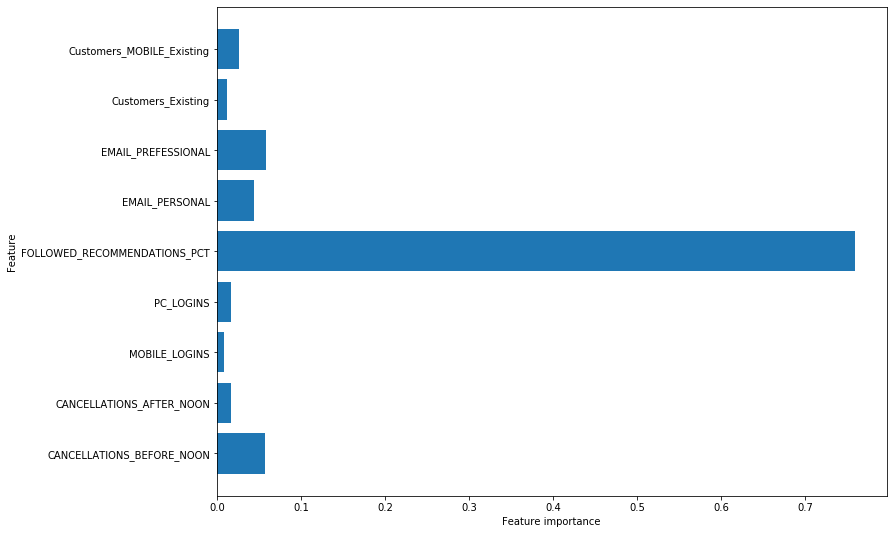

In [27]:
_ = pd.DataFrame(X_train,columns=feature_columns)
# plotting feature importance
plot_feature_importances(rfc,_)